# A BASIC EXAMPLE


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

First thing we are going to do is create our data. We will create a NumPy array "X" which will store the cordinates of our points, and also a array "y" which will be our label array.

In [ ]:
X = np.array([[5,6],
             [7,9],
             [5, 4],
             [9,9],
             [4,3.6],
             [10,12]])

y = [0,1,0,1,0,1]

Let's plot the points and see how it looks

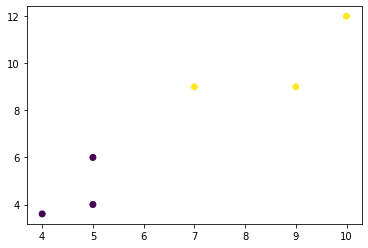

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

We can see that these points are clustered together and we can easily divide them in two groups. But what if we added another point that is almost in the middle, how do we know in which group it would belong in. Now SVM's come in handy. We are going to use the SVM to separate the data.

We are going to define our SVM with a linear kernel and with C. C is a valuation of "how badly" you want to properly classify, or fit, everything. We are also going to fit the data with the corresponding labels.

In [ ]:
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

The learning is quick because we have a small dataset. The next thing we can do is we can predict and test our classifier.

In [ ]:
result = clf.predict([[2, 3.7]])
print(result)

[0]


Our SVM predicted 0 as the label, that is correct, because it is a lower cordinate pair.

Next thing we can do is we can visualize our data and draw the line that seperates the data.

No handles with labels found to put in legend.


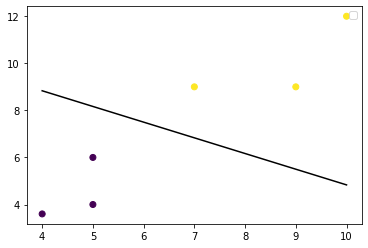

In [ ]:
w = clf.coef_[0]
a = -w[0] / w[1]

xx = np.linspace(4, 10)
yy = a * xx - clf.intercept_[0] / w[1]

plt.plot(xx, yy, 'k-')

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

We have seen what the support vectors do, let's see what points in our data were chosen to be the support vectors.

In [ ]:
supp_vec = clf.support_vectors_
print(supp_vec)

[[5. 6.]
 [7. 9.]]


The points [3.5, 3.8] and [7, 9] were chosen as the support vectors.
Let's draw the plot again, but now lets draw the support vectors and the margins that go throught them.

First thing we need to do is to calculate the margin and the two lines that lay above and bellow it.

In [ ]:
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

After we have obtained the two lines we can visuzalize it.

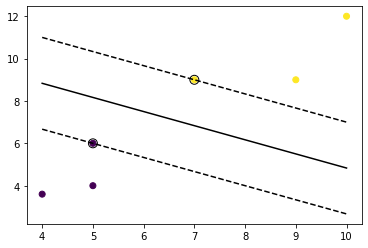

In [ ]:
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none', edgecolors='k')
plt.scatter(X[:, 0], X[:, 1], c=y)

We see how the lines seperate the positive and the negative data. All points bellow the lower line are the negative data and the points above the upper line are positive data.

# Make_blobs example

Let's now do the SVM on the make_blobs function. We are going to create two blobs with 50 data points each.

In [21]:
from sklearn.datasets import make_blobs

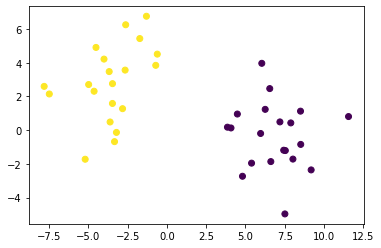

In [28]:
X, y = make_blobs(n_samples=40, centers=2, cluster_std=2)
plt.scatter(X[:, 0], X[:, 1], c=y)

Train our classifier on the data and also visualize the support vectors and draw the margin lines.

In [29]:
clf = svm.SVC(kernel='linear', C=1.)
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

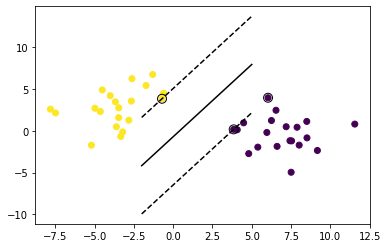

In [42]:
w = clf.coef_[0]
a = -w[0] / w[1]

xx = np.linspace(-2, 5)
yy = a * xx - clf.intercept_[0] / w[1]

plt.scatter(X[:, 0], X[:, 1], c = y)

margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none', edgecolors='k')

plt.show()

#SVM on make_moons

Now let's try another interesting dataset, it is the make_moons dataset. We are creating 100 points which will be in a spiral shape.

In [ ]:
from sklearn.datasets import make_moons

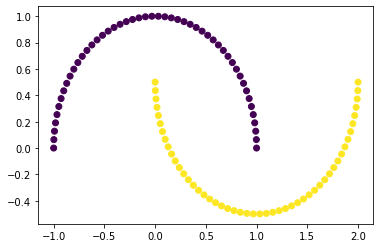

In [ ]:
X, y = make_moons()
plt.scatter(X[:, 0], X[:, 1], c=y)

From the following visualization we can see that a straight line cannot classify this data accurately. Because of this, we need to use another kernel. For this dataset we are going to use the 'rbg' kernel, which is a non-linear kernel.

In [ ]:
clf = svm.SVC(kernel='rbf', C=20)
clf.fit(X, y)

SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
X1= X[:,0]
X2= X[:,1]

X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

In [ ]:
X1_coord = np.linspace(X1_min, X1_max, 500)
X2_coord = np.linspace(X2_min, X2_max, 500)

In [ ]:
X1_C, X2_C = np.meshgrid(X1_coord, X2_coord)

In [ ]:
X1X2 = np.c_[X1_C.ravel(), X2_C.ravel()]

In [ ]:
Z = clf.predict(X1X2).reshape(X1_C.shape)

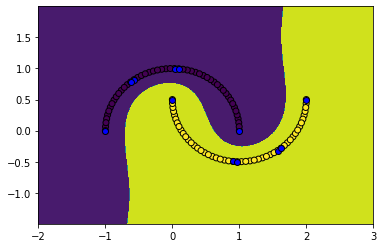

In [ ]:
axes = plt.gca()
axes.contourf(X1_C, X2_C, Z, alpha = 1)
plt.scatter(X1, X2, c = y, edgecolors = 'k')
axes.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], facecolors='blue', edgecolors='k') 
plt.show()

Now we see how the 'rbf' kernel wraps around the points and correctly classifies them. The blue dots are the support vectors.